In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNet
from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
#from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
# from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru')

In [ ]:
#bawal putih
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Bawal Putih')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#belato
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Belato')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cakalang
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Cakalang')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gembolo
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Gembolo')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gole-gole
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Gole Gole')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kakap merah
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Kakap Merah')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kembung
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Kembung')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kerapu
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Kerapu')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tenggiri
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Tenggiri')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tuna
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train/Ikan Tuna')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_Baru/train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(10)

,Filepath,Label
0,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Kerapu
1,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Bawal Putih
2,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Bawal Putih
3,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Bawal Putih
4,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Kerapu
5,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Kakap Merah
6,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Cakalang
7,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Tuna
8,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Belato
9,/content/drive/MyDrive/BANGKIT 2023/Data_Ikan_...,Ikan Tenggiri


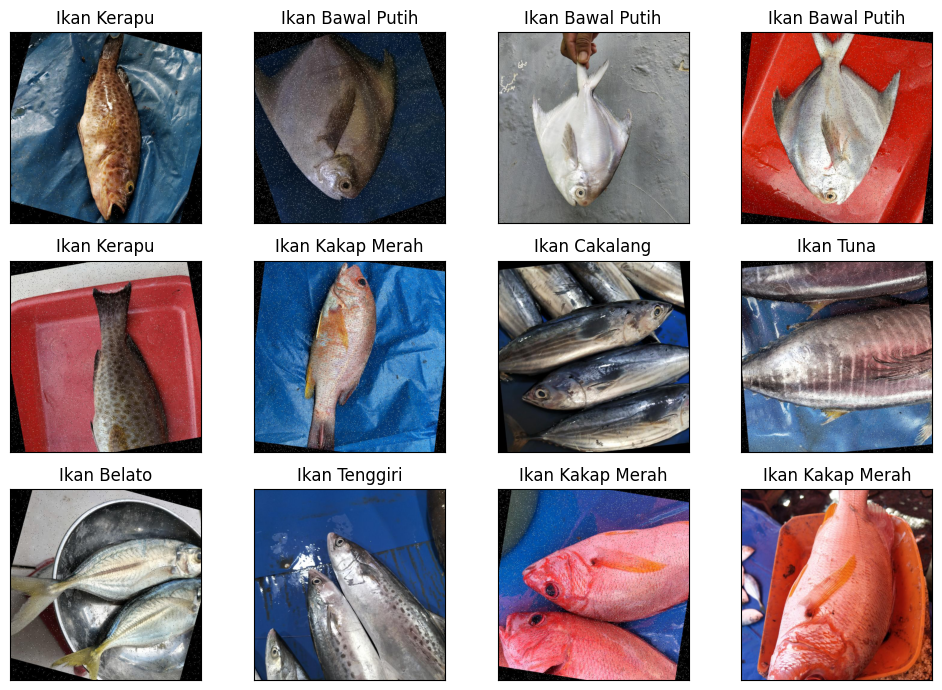

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

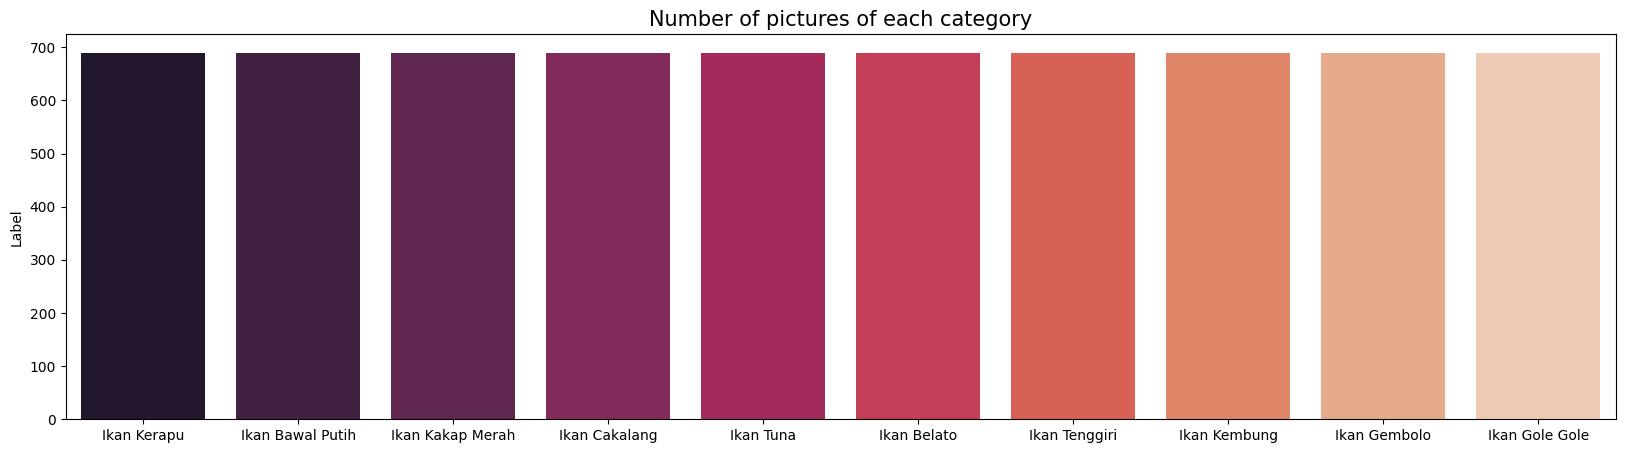

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, val_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=val_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )
# test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
#                                         x_col='Filepath',
#                                         y_col='Label',
#                                          seed=0,
#                                          target_size=(416,416),
#                                          batch_size=16,
#                                          shuffle=False,
#                                          class_mode = 'categorical',
#                                          )

Found 5520 validated image filenames belonging to 10 classes.
Found 1380 validated image filenames belonging to 10 classes.


# Modelling & Training ResNet-50




In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
# from tensorflow.keras.applications import ResNet50    # underfit
# from tensorflow.keras.applications import ResNet152V2 # overfit
model3 = tf.keras.models.Sequential([
    MobileNetV2(weights="imagenet", include_top=False, input_tensor=model_input),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

# model3.layers[0].trainable = False


In [ ]:
for layer in model3.layers[:-1]:
    layer.trainable=False

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1 and logs.get('val_loss') < 0.1):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/BANGKIT 2023/Percobaan-MobileNetV2/MobileNetV2-256-0.2.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
callbacks = myCallback()
optimizer = Adam(learning_rate=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 13, 13, 1280)     2257984   
 ional)                                                          
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 1280)      0         
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [ ]:
mobilenetv2_history = model3.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=validasi_data.n/16,
                  epochs=100,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/100
345/345 [==============================] - ETA: 0s - loss: 2.3343 - accuracy: 0.1127 
Epoch 1: loss improved from inf to 2.33432, saving model to /content/drive/MyDrive/BANGKIT 2023/Percobaan-MobileNetV2/MobileNetV2-256-0.2.h5
345/345 [==============================] - 4695s 14s/step - loss: 2.3343 - accuracy: 0.1127 - val_loss: 2.2894 - val_accuracy: 0.1370
Epoch 2/100
345/345 [==============================] - ETA: 0s - loss: 2.2802 - accuracy: 0.1370
Epoch 2: loss improved from 2.33432 to 2.28021, saving model to /content/drive/MyDrive/BANGKIT 2023/Percobaan-MobileNetV2/MobileNetV2-256-0.2.h5
345/345 [==============================] - 311s 903ms/step - loss: 2.2802 - accuracy: 0.1370 - val_loss: 2.2561 - val_accuracy: 0.1913
Epoch 3/100
345/345 [==============================] - ETA: 0s - loss: 2.2435 - accuracy: 0.1966
Epoch 3: loss improved from 2.28021 to 2.24346, saving model to /content/drive/MyDrive/BANGKIT 2023/Percobaan-MobileNetV2/MobileNetV2-256-0.2.h5
345/345 

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:
#display
display_training_curves(
    resnet_history.history['loss'],
    resnet_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    resnet_history.history['accuracy'],
    resnet_history.history['val_accuracy'],
    'accuracy', 212)

# Evaluation dan Prediction

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = model3.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (validasi_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(val_df.Label)
print(classification_report(y_test, pred))

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(val_df.Filepath.iloc[i]))
    ax.set_title(f"True: {val_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# Save Model

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive"
PROJECT_NAME = "Percobaan-ResNet50"
SAVE_MODEL_NAME = "Final100-ResNet-512-01.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model3.save(save_model_path,include_optimizer=False)

# Lanjut Epoch Pake Checkpoint Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import os
os.chdir('C:/Users/ASUS/Dataset')
print(os.getcwd() + "\n")

C:\Users\ASUS\Dataset



In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:

# Tentukan path penyimpanan model
checkpoint_path = 'C:/Users/ASUS/Dataset/Hasil/Percobaan-Resnet50/model_resnet50-v1.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
callbacks = myCallback()
resnet.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
resnet_history = resnet.fit(train_data,
                            steps_per_epoch=train_data.n/16,
                            epochs=20,
                            validation_data=val_data,
                            validation_steps=val_data.n/16,
                            callbacks=([callbacks],[checkpoint_callback]),
                            verbose = 2
                            )

FileNotFoundError: [Errno 2] No such file or directory: 'Ikan Kerapu\\IMG_20230519_110110_jpg.rf.6007c179833f9823ca2971290de5382c.jpg'

# Predict new data

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#Input Gambar
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(416,416))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = resnet.predict(images, batch_size=10)
  print(classes)
  if classes[0][0] == 1:
    print('Penyu Hijau')
  elif classes[0][1] == 1:
    print('Penyu Lekang')
  elif classes[0][2] == 1:
    print('Penyu Sisik')
  elif classes[0][3] == 1:
    print('Penyu Tempayan')